In [105]:
import pandas as pd


df = pd.read_csv("spam.csv", encoding='ISO-8859-1')


In [106]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [107]:

df = df.iloc[:, :-3]


In [108]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [109]:
print("Dimensions:", df.shape)

Dimensions: (5572, 2)


In [110]:
print(df.describe())

          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [111]:
print(df['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [112]:
from imblearn.over_sampling import RandomOverSampler


In [113]:
X = df['v2']  
Y = df['v1']  


In [114]:

tfidf_vectorizer = TfidfVectorizer()


X_encoded = tfidf_vectorizer.fit_transform(X)


X_array = X_encoded.toarray()


Y_flat = Y.to_numpy()  


print("Shape of X_array:", X_array.shape)  
print("Shape of Y_flat:", Y_flat.shape)    


ros = RandomOverSampler(random_state=42)


X_resampled, Y_resampled = ros.fit_resample(X_array, Y_flat)


Shape of X_array: (5572, 8672)
Shape of Y_flat: (5572,)


In [115]:
y_resampled_series

0       0
1       0
2       1
3       0
4       0
       ..
9645    1
9646    1
9647    1
9648    1
9649    1
Length: 9650, dtype: int32

In [116]:
X_resampled.shape

(9650, 8672)

In [117]:
Y_resampled.shape

(9650,)

In [118]:
Y_resampled

array(['ham', 'ham', 'spam', ..., 'spam', 'spam', 'spam'], dtype=object)

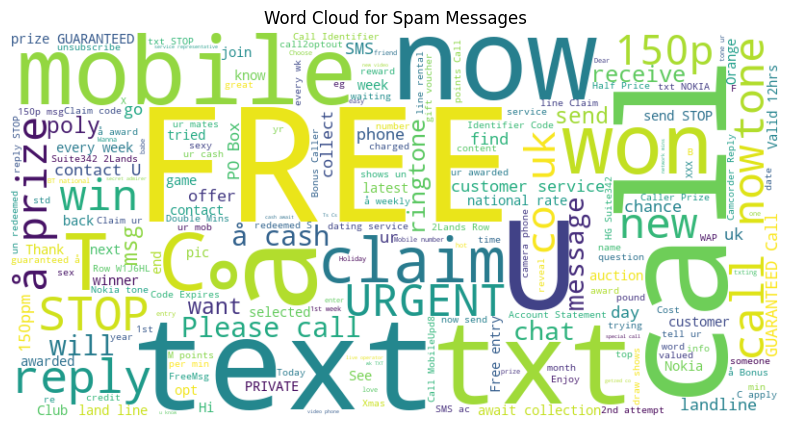

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


spam_text = df[df['v1'] == 'spam']['v2']


spam_text_combined = ' '.join(spam_text)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text_combined)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()


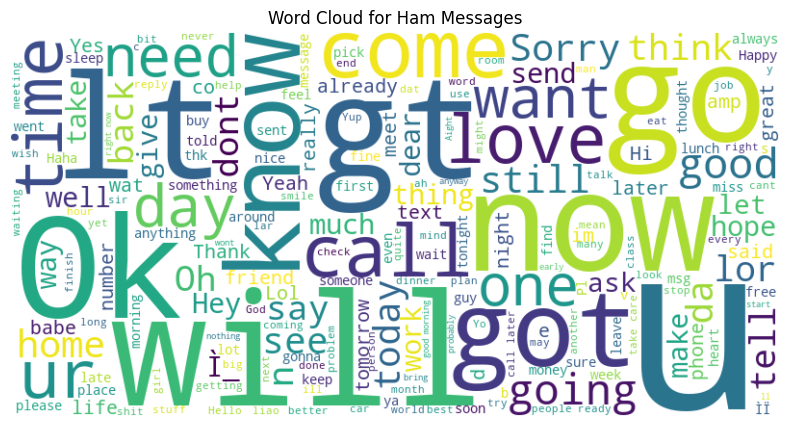

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ham_text = df[df['v1'] == 'ham']['v2']


ham_text_combined = ' '.join(ham_text)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()


In [121]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['v1'])  
y = df['v1']


X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)


print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (7720, 8672) (7720,)
Test set shape: (1930, 8672) (1930,)


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr = LogisticRegression()


lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Model Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       985
        spam       0.99      0.98      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [123]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()


nb.fit(X_train, y_train)


y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Model Accuracy: {accuracy_nb:.2f}")


print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model Accuracy: 0.98
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       985
        spam       0.99      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



In [124]:
from sklearn.svm import SVC


svm = SVC()


svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")


print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       985
        spam       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



In [125]:
y_pred_svm

array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype=object)

In [126]:
y_test

array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype=object)

In [127]:



def classify_message(message):
    
    message_tfidf = tfidf_vectorizer.transform([message])
    
    
    message_tfidf_dense = message_tfidf.toarray()  
    
    
    prediction = svm.predict(message_tfidf_dense)
    
    
    if prediction == 0:
        return "Ham"
    else:
        return "Spam"


test_message = "Hey, are we still meeting for lunch tomorrow?"

result = classify_message(test_message)
print(f"The message is classified as: {result}")


The message is classified as: Spam
